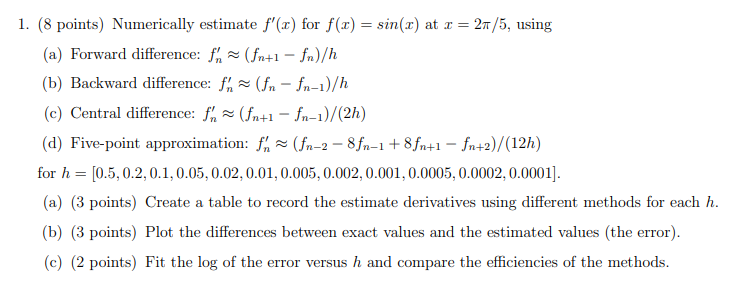

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def f(x):
    return np.sin(x)
a=2*np.pi/5
def fd(x,h):
    return (f(x+h)-f(x))/h
def bd(x,h):
    return (-f(x-h)+f(x))/h
def cd(x,h):
    return (f(x+h)-f(x-h))/(2*h)
def fid(x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
h = np.array([0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001])
data={}
x=["Forward Difference","Backward Difference","Central Difference","Five Point Difference"]
for i in h:
    d=[]
    d.append(fd(a,i))
    d.append(bd(a,i))
    d.append(cd(a,i))
    d.append(fid(a,i))
    data[i]=d
df = pd.DataFrame(data, index =x)



df






,0.5000,0.2000,0.1000,0.0500,0.0200,0.0100,0.0050,0.0020,0.0010,0.0005,0.0002,0.0001
Forward Difference,0.063449,0.212172,0.260989,0.285117,0.299486,0.304257,0.306638,0.308066,0.308541,0.308779,0.308922,0.308969
Backward Difference,0.529153,0.401750,0.356015,0.332660,0.318507,0.313767,0.311393,0.309968,0.309492,0.309255,0.309112,0.309065
Central Difference,0.296301,0.306961,0.308502,0.308888,0.308996,0.309012,0.309016,0.309017,0.309017,0.309017,0.309017,0.309017
Five Point Difference,0.308392,0.309001,0.309016,0.309017,0.309017,0.309017,0.309017,0.309017,0.309017,0.309017,0.309017,0.309017


Text(0, 0.5, 'Absolute Error')

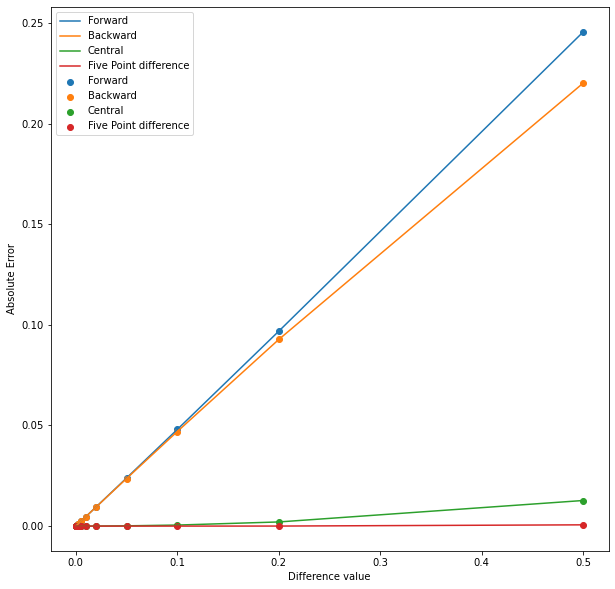

In [6]:
def fp(x):
    return np.cos(x)
forward=abs(fd(a,h)-fp(a))
backward=abs(bd(a,h)-fp(a))
central=abs(cd(a,h)-fp(a))
fivepoint=abs(fid(a,h)-fp(a))

plt.figure(figsize=(10,10))
plt.scatter(h,forward,label='Forward')
plt.scatter(h,backward,label='Backward')
plt.scatter(h,central,label='Central')
plt.scatter(h,fivepoint,label='Five Point difference')
#plt.xticks(np.arange(0, 0.5, step=0.05))
plt.plot(h,forward,label='Forward')
plt.plot(h,backward,label='Backward')
plt.plot(h,central,label='Central')
plt.plot(h,fivepoint,label='Five Point difference')

plt.legend()
plt.xlabel("Difference value")
plt.ylabel("Absolute Error")


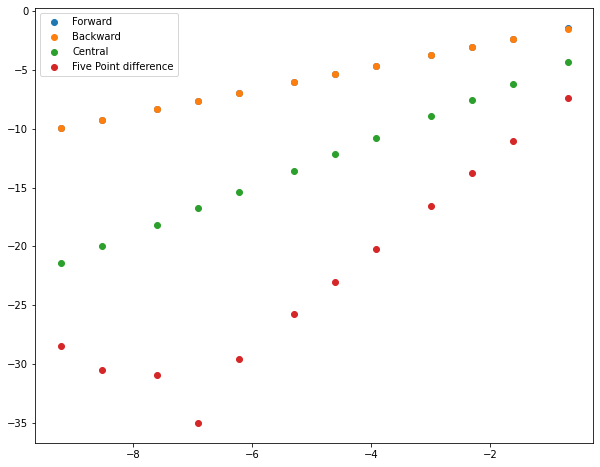

In [7]:
forw=np.log(abs(fd(a,h)-fp(a)))
backy=np.log(abs(bd(a,h)-fp(a)))
centy=np.log(abs(cd(a,h)-fp(a)))
fivepo=np.log(abs(fid(a,h)-fp(a)))
plt.figure(figsize=(10,8))
plt.scatter(np.log(h),forw,label='Forward')
plt.scatter(np.log(h),backy,label='Backward')
plt.scatter(np.log(h),centy,label='Central')
plt.scatter(np.log(h),fivepo,label='Five Point difference')

plt.legend()




In [8]:
forward=np.log(abs(fd(a,h)-fp(a)))

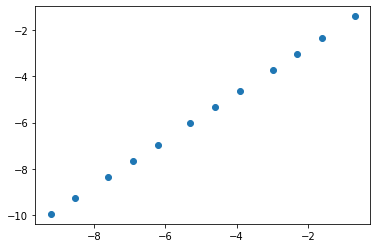

In [9]:
plt.scatter(np.log(h),forw,label='Forward')

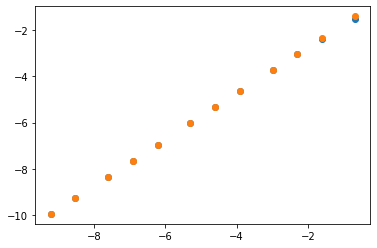

In [10]:
plt.scatter(np.log(h),backy,label='Backward')
plt.scatter(np.log(h),forw,label='Forward')

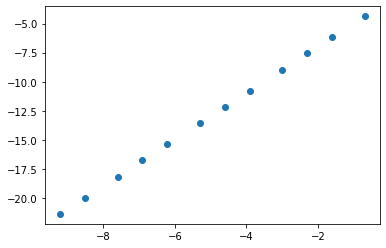

In [11]:
plt.scatter(np.log(h),centy,label='Central')

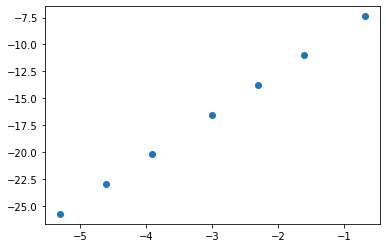

In [12]:
plt.scatter(np.log(h)[:7],fivepo[:7],label='Central')

C:\anaconda\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 0, 'Log(h)')

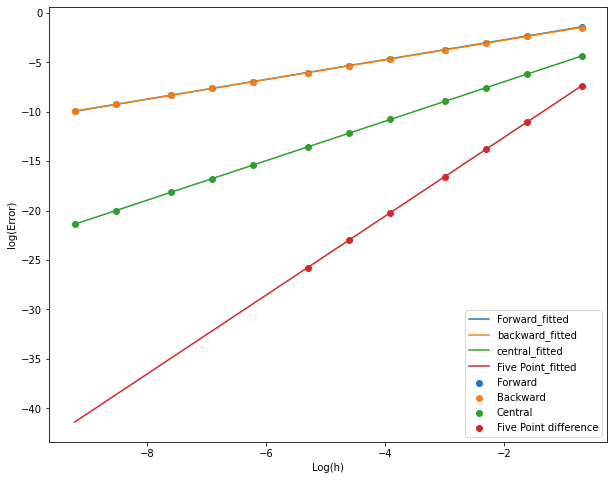

In [13]:
from scipy.optimize import curve_fit
def test(x, a, b):
    return a *x + b
sf,inf=curve_fit(test, np.log(h), forw)[0][0],curve_fit(test, np.log(h), forw)[0][1]
sb,inb=curve_fit(test, np.log(h), backy)[0][0],curve_fit(test, np.log(h), backy)[0][1]
sc,inc=curve_fit(test, np.log(h), centy)[0][0],curve_fit(test, np.log(h), centy)[0][1]
sfi,infi=curve_fit(test, np.log(h)[:7],fivepo[:7])[0][0],curve_fit(test, np.log(h)[:7], fivepo[:7])[0][1]
plt.figure(figsize=(10,8))
plt.plot(np.log(h),sf*np.log(h)+inf*np.ones(len(h)),label="Forward_fitted")
plt.plot(np.log(h),sb*np.log(h)+inb*np.ones(len(h)),label="backward_fitted")
plt.plot(np.log(h),sc*np.log(h)+inc*np.ones(len(h)),label="central_fitted")
plt.plot(np.log(h),sfi*np.log(h)+infi*np.ones(len(h)),label="Five Point_fitted")

plt.scatter(np.log(h),forw,label='Forward')
plt.scatter(np.log(h),backy,label='Backward')
plt.scatter(np.log(h),centy,label='Central')
plt.scatter(np.log(h)[:7],fivepo[:7],label='Five Point difference')
plt.legend()

plt.ylabel("log(Error)")
plt.xlabel("Log(h)")

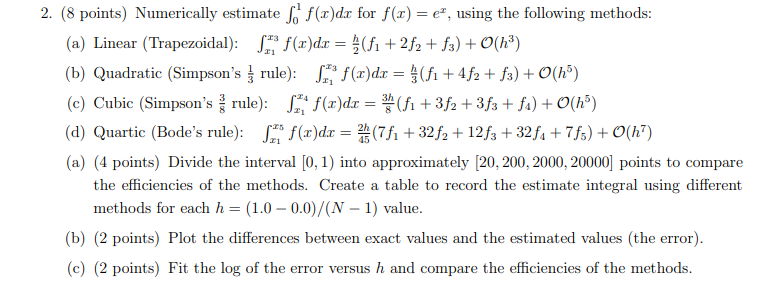

In [5]:
import numpy as np
#N=no of intervals
def f(x):
    return np.exp(x)
def trap(f,n):
    s=0
    a=np.linspace(0,1,n+1)
    h=a[1]-a[0]
    for i in range(1,n,2):
        s=s+(f(a[i-1])+2*f(a[i])+f(a[i+1]))*h/2
    return s
def quad(f,n):
    s=0
    a=np.linspace(0,1,n+1)
    h=a[1]-a[0]
    for i in range(1,n,2):
        s=s+(f(a[i-1])+4*f(a[i])+f(a[i+1]))*h/3
    return s
def cub(f,n):
    s=0
    a=np.linspace(0,1,n+1)
    h=a[1]-a[0]
    for i in range(1,n,3):
        s=s+(f(a[i-1])+3*f(a[i])+3*f(a[i+1])+f(a[i+2]))*h*(3/8)
    return s
    
def bode(f,n):
    s=0
    a=np.linspace(0,1,n+1)
    h=a[1]-a[0]
    for i in range(1,n,4):
        s=s+(7*f(a[i-1])+32*f(a[i])+12*f(a[i+1])+32*f(a[i+2])+7*f(a[i+3]))*h*(2/45)
    return s
    


    

In [72]:
import pandas as pd
p=np.array([24,240,2400,24000])
data={}
x=["linear","Quadratic","Cubic","Bode"]
for i in p:
    d=[]
    d.append(trap(f,i))
    d.append(quad(f,i))
    d.append(cub(f,i))
    d.append(bode(f,i))
    data[i]=d
df = pd.DataFrame(data, index =x)



df

,12,24,48,96
linear,1.719276,1.718530,1.718344,1.718297
Quadratic,1.718282,1.718282,1.718282,1.718282
Cubic,1.718283,1.718282,1.718282,1.718282
Bode,1.718282,1.718282,1.718282,1.718282


In [78]:
real=np.exp(1)-1
h=np.array([12,24,48,96])
erlin=[]
erquad=[]
ercube=[]
erbole=[]

for i in h:
    erlin.append(np.log(abs(real-trap(f,i))))
    erquad.append(np.log(abs(real-quad(f,i))))
    ercube.append(np.log(abs(real-cub(f,i))))
    erbole.append(np.log(abs(real-bode(f,i))))
    




Text(0, 0.5, 'log(Absolute Error)')

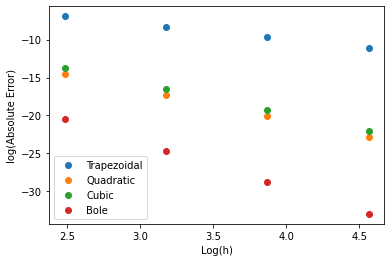

In [79]:
import matplotlib.pyplot as plt
plt.scatter(np.log(h),erlin,label="Trapezoidal")
plt.scatter(np.log(h),erquad,label="Quadratic")
plt.scatter(np.log(h),ercube,label="Cubic")
plt.scatter(np.log(h),erbole,label="Bole")
plt.legend()
plt.xlabel("Log(h)")
plt.ylabel("log(Absolute Error)")

In [80]:
from scipy.optimize import curve_fit
def test(x,a,b):
    return a*x+b


Text(0.5, 0, 'Log(h)')

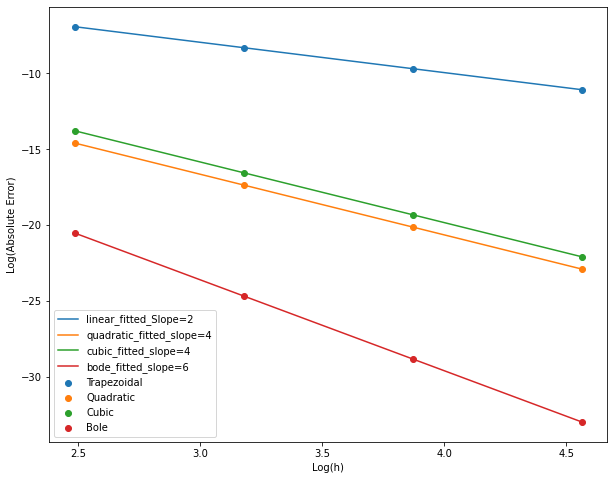

In [81]:
sf,ib=curve_fit(test,np.log(h),erlin)[0][0],curve_fit(test,np.log(h),erlin)[0][1]
sq,iq=curve_fit(test,np.log(h),erquad)[0][0],curve_fit(test,np.log(h),erquad)[0][1]
sc,ic=curve_fit(test,np.log(h),ercube)[0][0],curve_fit(test,np.log(h),ercube)[0][1]
sb,ibo=curve_fit(test,np.log(h),erbole)[0][0],curve_fit(test,np.log(h),erbole)[0][1]
plt.figure(figsize=(10,8))

plt.plot(np.log(h),sf*np.log(h)+ib*np.ones(len(h)),label="linear_fitted_Slope=2")
plt.plot(np.log(h),sq*np.log(h)+iq*np.ones(len(h)),label="quadratic_fitted_slope=4")
plt.plot(np.log(h),sc*np.log(h)+ic*np.ones(len(h)),label="cubic_fitted_slope=4")
plt.plot(np.log(h),sb*np.log(h)+ibo*np.ones(len(h)),label="bode_fitted_slope=6")
plt.scatter(np.log(h),erlin,label="Trapezoidal")
plt.scatter(np.log(h),erquad,label="Quadratic")
plt.scatter(np.log(h),ercube,label="Cubic")
plt.scatter(np.log(h),erbole,label="Bole")
plt.legend()
plt.ylabel("Log(Absolute Error)")
plt.xlabel("Log(h)")

# Notice that I have plotted natural log of error (i.e. base=e) That's Why due to standard Double precision , I can't rely on values beyond 16 X $$log_{e}10$$ =36.5
  

In [82]:
print("The slope by the Trapezoidal, Quadratic , cubic , Bode's Rule are coming to be respectively  = ", -sf,-sq,-sc,-sb)

The slope by the Trapezoidal, Quadratic , cubic , Bode's Rule are coming to be respectively  =  1.9999475637786877 3.999627108274002 3.9992513633114273 5.996606014598596


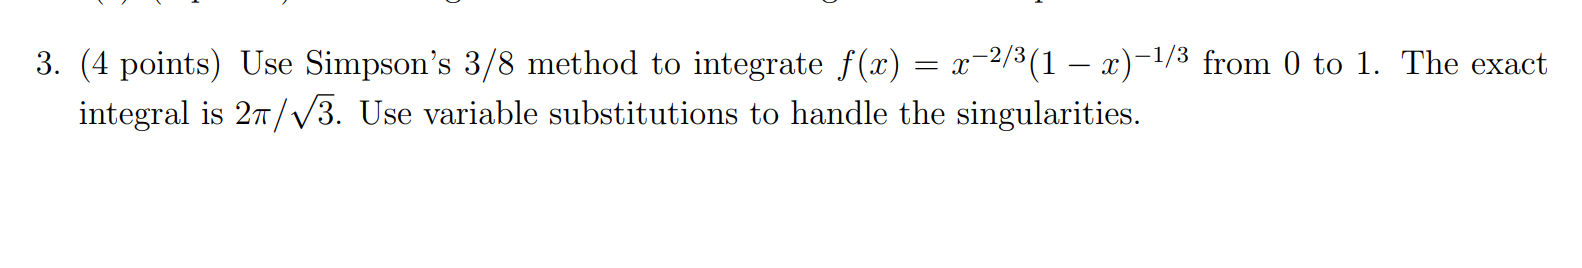

We will devide the function into two ranges (0,0.5) and (0.5,1). And after the substitution we will get two different functions at the two ranges , which doesn't have the singularity anymore.

In [94]:
def cub(n): 
    def f(x):
        return 3/(1-x**3)**(1/3)
    def h(n):
         return np.linspace(0,np.cbrt(1/2),n)
    s=0
    b=h(n)[1]-h(n)[0]
    for i in range(1,n-2):
        a=h(n)[i]
        if i%3==0:
            s=s+2*f(a)*b*(3/8)
        else:
            s=s+3*f(a)*b*(3/8)
    return s+(f(0)+f(np.cbrt(1/2)))*b*(3/8)
s=cub(20000)
def f(x):
    return 3*x/(1-x**3)**(2/3)
def h(n):
    return np.linspace(0,np.cbrt(1/2),n)
def cubic(n):
    def f(x):
        return 3*x/(1-x**3)**(2/3)
    def h(n):
         return np.linspace(0,np.cbrt(1/2),n)
    s=0
    b=h(n)[1]-h(n)[0]
    for i in range(1,n-2):
        a=h(n)[i]
        if i%3==0:
            s=s+2*f(a)*b*(3/8)
        else:
            s=s+3*f(a)*b*(3/8)
    return s+(f(0)+f(np.cbrt(1/2)))*b*(3/8)
    

t=cubic(20000)
print("The numerically computed value of the integral is=", s+t)

The numerically computed value of the integral is= 3.627298739717129


In [100]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [25]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])